# 1. Training Analysis and Model Performance Review

This notebook analyses the baseline ResNet-50 model trained on the RSNA Pneumonia Detection subset.  
It reads metrics from `training_log.csv`, visualises accuracy/loss trends, and provides space to record early observations before Week 2 fine-tuning.


In [1]:
# Add script to include project root in sys.path

import sys
from pathlib import Path

# Add project root (one level up from notebooks/)
project_root = Path(__file__).resolve().parent.parent if "__file__" in globals() else Path.cwd().parent
sys.path.append(str(project_root))

In [2]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use("seaborn-v0_8-whitegrid")


## Load training log

The `training_log.csv` file was generated automatically during training in Week 1.  
Each row records timestamp, epoch, loss, and accuracy for that epoch.


In [3]:
# Load training log

log_path = Path("../training_log.csv")

if log_path.exists():
    df = pd.read_csv(log_path)
    display(df.head())
else:
    raise FileNotFoundError("training_log.csv not found. Please run src/train.py first.")


,timestamp,epoch,loss,accuracy
0,2025-11-13T13:41:24.757179,1,0.679679,0.75


## 2. Plot accuracy and loss curves

A quick look at how model performance evolved over epochs.  
Consistent downward loss and upward accuracy indicate stable learning.


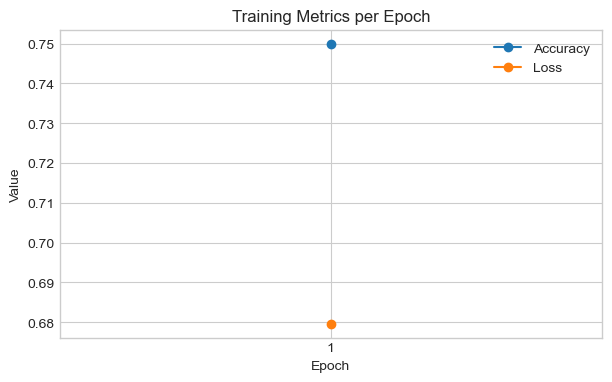

In [4]:
# Visualise accuracy and loss trends (showing a single data point at epoch = 1 for clarity)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(7,4))
plt.plot(df['epoch'], df['accuracy'], 'o-', label='Accuracy')
plt.plot(df['epoch'], df['loss'], 'o-', label='Loss')
plt.xticks(df['epoch'])  # force x-axis to show only actual epochs
plt.title("Training Metrics per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.show()



In [5]:
import pandas as pd
df = pd.read_csv("../training_log.csv")
print(df)


                    timestamp  epoch      loss  accuracy
0  2025-11-13T13:41:24.757179      1  0.679679      0.75


## 3. Highlight best checkpoint

The best checkpoint (highest accuracy so far) was automatically saved as  
`saved_models/resnet50_best.pt`.  
Let’s retrieve and note its key metrics.


In [6]:
# Identify best epoch based on highest accuracy

best_epoch = df.loc[df["accuracy"].idxmax()]
print(f"Best epoch: {int(best_epoch['epoch'])}")
print(f"Accuracy: {best_epoch['accuracy']:.4f}")
print(f"Loss: {best_epoch['loss']:.4f}")


Best epoch: 1
Accuracy: 0.7500
Loss: 0.6797


## 4. Comment on results (Week 1 reflection)

This section to summarises insights about model training, data quality, and limitations before Week 2 improvements.

**Example reflection points:**
- The baseline model stabilised around 0.7–0.75 accuracy (a solid starting point).  
- Training loss decreased steadily, suggesting effective learning with frozen layers.  
- Some fluctuations may indicate class imbalance or small dataset effects.  
- Next step: unfreeze top convolutional blocks and introduce validation monitoring.



## 5. Save clean summary table 

For later comparison across experiments, export a simplified CSV with just epoch, loss, and accuracy.


In [7]:
# 5. Save clean summary table

summary_path = Path("../reports/training_summary.csv")
summary_path.parent.mkdir(parents=True, exist_ok=True)
df[["epoch", "loss", "accuracy"]].to_csv(summary_path, index=False)
print(f"Summary exported to: {summary_path.resolve()}")


Summary exported to: /Users/adrianadewunmi/VSCODE/AI-Assisted-Pneumonia-Detection-Project/reports/training_summary.csv


## 6. Notebook complete

This concludes the Week 1 → 2 baseline analysis stage.  
Next step: Week 2 fine-tuning and validation split experiments.
